<a href="https://colab.research.google.com/github/Ray-Mun-Ben/-AI-Coursework-2025/blob/main/Mall_Customers_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
from google.colab import files
import io

uploaded = files.upload()



Saving Mall_Customers.csv to Mall_Customers.csv


In [11]:
df = pd.read_csv(io.BytesIO(uploaded['Mall_Customers.csv']))


In [14]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [16]:
df.isnull().sum()


,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [17]:
df.duplicated().sum()


np.int64(0)

In [18]:
df.dtypes


,0
CustomerID,int64
Gender,object
Age,int64
Annual Income (k$),int64
Spending Score (1-100),int64


In [19]:
df.describe()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [23]:
df = df.rename(columns={
    'annual_income_(k$)': 'annual_income',
    'spending_score_(1-100)': 'spending_score'
})


In [21]:
df.head()
df.shape


(200, 5)

carry out Exploratory Data Analysis
processes to retrieve at least 3 insights/observations from the dataset.

In [22]:
df.describe()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Checking how customers are divided by gender.

/tmp/ipython-input-490632119.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette='Set2')


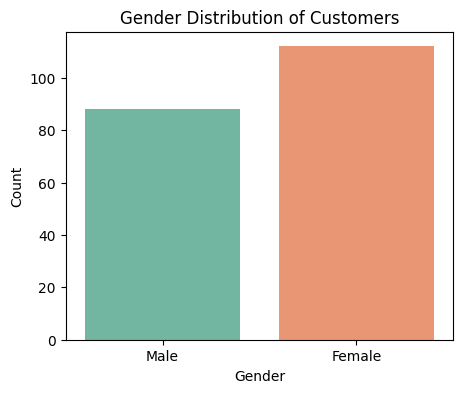

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5,4))
sns.countplot(x='Gender', data=df, palette='Set2')
plt.title('Gender Distribution of Customers')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


Checking customer age distribution

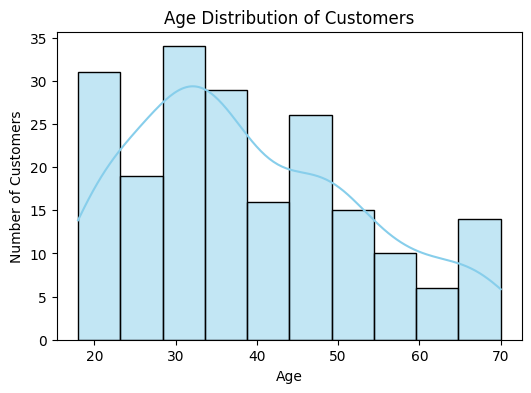

In [25]:
plt.figure(figsize=(6,4))
sns.histplot(df['Age'], bins=10, kde=True, color='skyblue')
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.show()


Visualizing the relationship between income and spending.

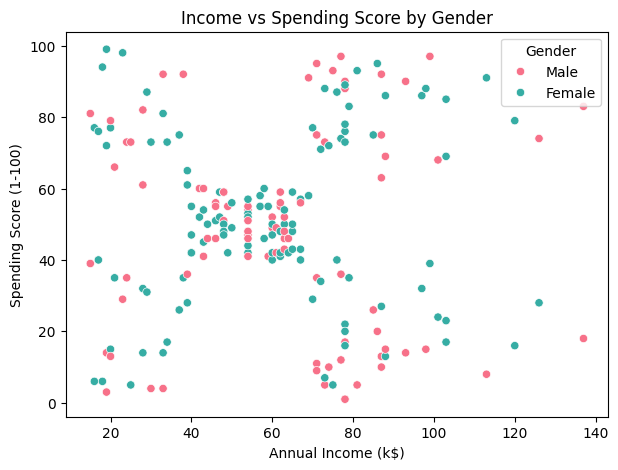

In [26]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender', data=df, palette='husl')
plt.title('Income vs Spending Score by Gender')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()


visualizing spending patterns for each age group

/tmp/ipython-input-2422105810.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Age Group', y='Spending Score (1-100)', data=df, estimator='mean', ci=None, palette='viridis')
/tmp/ipython-input-2422105810.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Age Group', y='Spending Score (1-100)', data=df, estimator='mean', ci=None, palette='viridis')


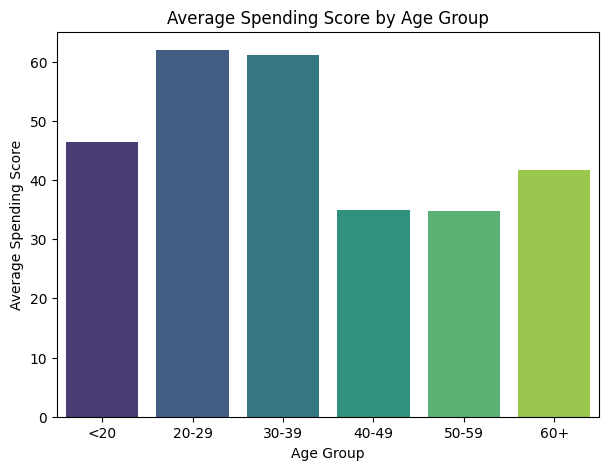

In [27]:
age_bins = [0, 20, 30, 40, 50, 60, 70]
age_labels = ['<20', '20-29', '30-39', '40-49', '50-59', '60+']
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

plt.figure(figsize=(7,5))
sns.barplot(x='Age Group', y='Spending Score (1-100)', data=df, estimator='mean', ci=None, palette='viridis')
plt.title('Average Spending Score by Age Group')
plt.ylabel('Average Spending Score')
plt.show()


Use the k-means algorithm to create groups of customers based on:
a. 1 suitable feature.
b. 2 suitable features.

In [42]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


X1 = df[['Spending Score (1-100)']]



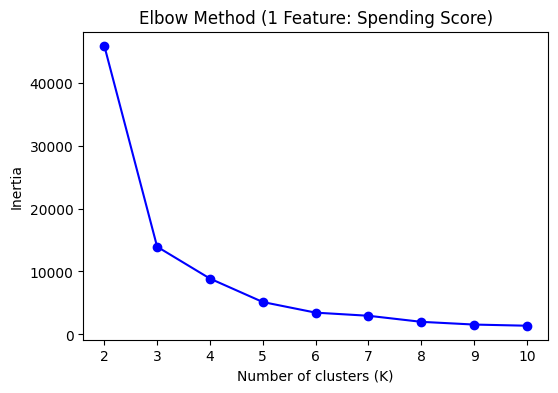

In [43]:
inertia = []
K = range(2, 11)  # start from 2 since silhouette needs at least 2 clusters
for k in K:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X1)
    inertia.append(model.inertia_)

plt.figure(figsize=(6,4))
plt.plot(K, inertia, 'bo-')
plt.title('Elbow Method (1 Feature: Spending Score)')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.show()


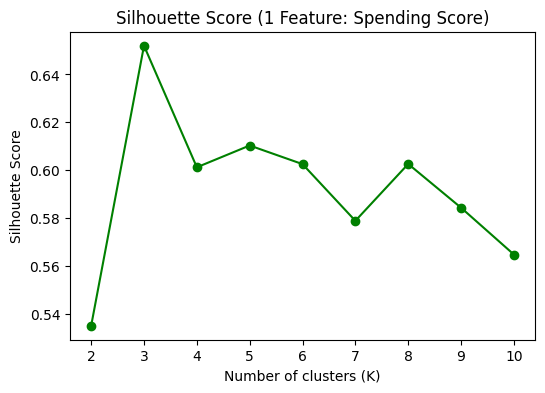

Best K (1 feature) based on Silhouette Score = 3


In [44]:
silhouette_scores = []
for k in K:
    model = KMeans(n_clusters=k, random_state=42)
    labels = model.fit_predict(X1)
    score = silhouette_score(X1, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(6,4))
plt.plot(K, silhouette_scores, 'go-')
plt.title('Silhouette Score (1 Feature: Spending Score)')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score')
plt.show()

best_k_1feature = K[silhouette_scores.index(max(silhouette_scores))]
print(f'Best K (1 feature) based on Silhouette Score = {best_k_1feature}')


In [46]:
kmeans1 = KMeans(n_clusters=best_k_1feature, random_state=42)
df['Cluster_1feature'] = kmeans1.fit_predict(X1)


In [48]:
X2 = df[['Annual Income (k$)', 'Spending Score (1-100)']]


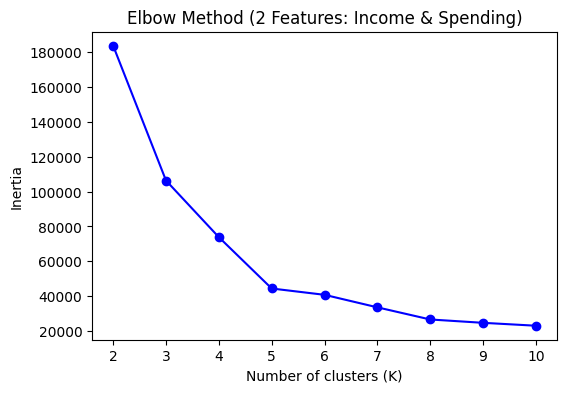

In [49]:
inertia = []
K = range(2, 11)
for k in K:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X2)
    inertia.append(model.inertia_)

plt.figure(figsize=(6,4))
plt.plot(K, inertia, 'bo-')
plt.title('Elbow Method (2 Features: Income & Spending)')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.show()


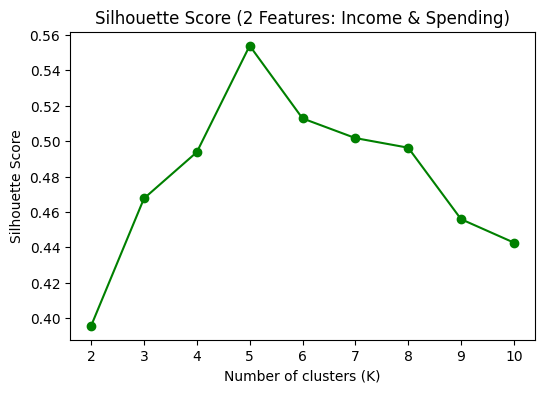

Best K (2 features) based on Silhouette Score = 5


In [50]:
silhouette_scores = []
for k in K:
    model = KMeans(n_clusters=k, random_state=42)
    labels = model.fit_predict(X2)
    score = silhouette_score(X2, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(6,4))
plt.plot(K, silhouette_scores, 'go-')
plt.title('Silhouette Score (2 Features: Income & Spending)')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score')
plt.show()

best_k_2features = K[silhouette_scores.index(max(silhouette_scores))]
print(f'Best K (2 features) based on Silhouette Score = {best_k_2features}')


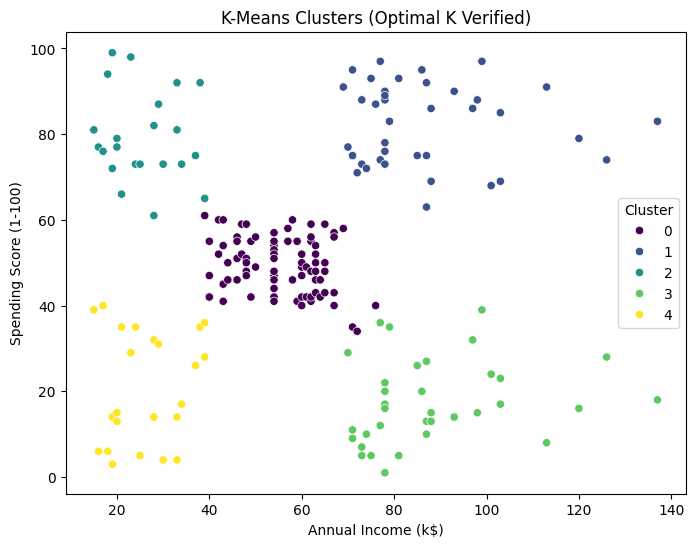

In [52]:
kmeans2 = KMeans(n_clusters=best_k_2features, random_state=42)
df['Cluster_2features'] = kmeans2.fit_predict(X2)

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,  # 👈 this line was missing
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster_2features',  # also use column name instead of df['Cluster_2features']
    palette='viridis'
)
plt.title('K-Means Clusters (Optimal K Verified)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()


5. Using a case example of a mall segmenting customers for customer engagement,
use the clustering done in 3b to suggest appropriate ways by which mall
management can interact with their customers.

They could implement a sort of spending score for based on the customer segments.
A possible segement could be the lower spending shoppers, these customers would be offered loyalty points and shopping vouchers as well as recomendations for more affordable brands.
a second segment could be the high spending customers, these are the ones who would be opting for luxury items. These customers might be offered special perks like exclusive parking or access to exclusive products.
These two minor forms of segmentation might help to narrow down the needs of the existing customers and develop a more efficient budget.